In [110]:
import pandas as pd
import numpy as np

In [111]:
# Show dataset and create an index
suicide_df = pd.read_csv('Resources/master.csv', index_col='country')
suicide_df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [112]:
suicide_df.columns

Index(['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [113]:
# Rename columns as some are misformatted
suicide_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)
suicide_df.columns

Index(['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [114]:
# Remove columns we don't need or will use in our analysis
suicide_df = suicide_df.drop(columns=['country-year','HDI for year'])

In [115]:
suicide_df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [116]:
# Normalize and change 'gdp_per_capita ($)' column into an integer dtype
suicide_df['gdp_for_year ($)'] = suicide_df['gdp_for_year ($)'].str.replace(',','')
suicide_df['gdp_for_year ($)'] = suicide_df['gdp_for_year ($)'].astype(int)

In [117]:
suicide_df.dtypes

year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [118]:
# Check for null values in the dataset
def num_missing(x):
    return sum(x.isnull())
# Apply Per Column
print ("Missing values per column:")
print (suicide_df.apply(num_missing, axis=0))

Missing values per column:
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
dtype: int64


In [119]:
# Suicide_df is pretty clean

In [120]:
# Start of high-level analysis
# Show number of suicides in each country
suicide_no_dataframe = suicide_df.pivot_table(values='suicides_no', index='country', aggfunc='sum')

In [121]:
# Show population of each country
suicide_pop_dataframe = suicide_df.pivot_table(values='population', index='country', aggfunc='sum')

In [122]:
# Create dataframe with population and suicide count
suicide_num_pop = suicide_no_dataframe.join(suicide_pop_dataframe)

In [123]:
# Divide suicide count column with population
suicide_num_pop['percentage'] = (suicide_num_pop['suicides_no']/suicide_num_pop['population'])

# Multiply percentage column by 100
suicide_series_percent = suicide_num_pop['percentage'].apply(lambda x: x *100)

# Create new dataframe showing percentage total of suicdes per each country's population
suicide_frame_percent = suicide_series_percent.to_frame()
suicide_frame_percent = suicide_frame_percent.rename(columns={'percentage':'Percentage of Suicide'})

In [124]:
suicide_num_pop = suicide_frame_percent.join(suicide_num_pop)

In [125]:
# Drop unecessary 'percentage' column
suicide_percentage_analysis = suicide_num_pop.drop(columns='percentage')

In [126]:
# Show brief description of percentage total
suicide_percentage_analysis['Percentage of Suicide'].describe()

count    101.000000
mean       0.011010
std        0.008728
min        0.000000
25%        0.004008
50%        0.008162
75%        0.015689
max        0.041182
Name: Percentage of Suicide, dtype: float64

In [127]:
suicide_percentage_analysis = suicide_percentage_analysis.sort_values(by=['Percentage of Suicide'], ascending=False)

In [128]:
suicide_percentage_analysis.to_csv('Suicide_Percentage_Breakdown.csv', index=True)

In [129]:
# Analyze Suicide Rates over time per Country

In [130]:
# Select the columns you want
suicide_overtime_df = suicide_df.drop(columns=['sex', 'age', 'population', 'suicides/100k pop', 'gdp_for_year ($)','gdp_per_capita ($)', 'generation'])

In [131]:
# Set Datetime index
suicide_overtime_df['year'] = pd.to_datetime(suicide_overtime_df['year'], format='%Y')

In [132]:
# Create pivot-table showing yearly suicide number per country
suicide_overtime_df = suicide_overtime_df.pivot_table(values='suicides_no', index='year', aggfunc='sum')

In [133]:
suicide_overtime_df = suicide_overtime_df[suicide_overtime_df.suicides_no != 15603]

In [134]:
import matplotlib.pyplot as plt

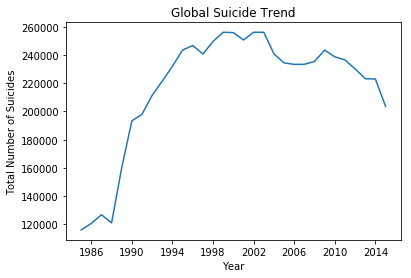

In [135]:
plt.plot(suicide_overtime_df.index.values, suicide_overtime_df['suicides_no'])
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.title('Global Suicide Trend')
plt.show()

In [136]:
ss = suicide_percentage_analysis['Percentage of Suicide'].nlargest(50)
ss = ss.to_frame()
ss.to_csv('Suicide_Percentage_Breakdown_Top_50.csv', index=True)

In [137]:
suicide_percentage_analysis.loc['United Kingdom']

Percentage of Suicide    7.867928e-03
suicides_no              1.368050e+05
population               1.738768e+09
Name: United Kingdom, dtype: float64

In [138]:
suicide_year_df = suicide_df.pivot_table(values='suicides_no', index='country', columns='year', aggfunc='sum')

In [139]:
suicide_2015_series = suicide_year_df[2015]
suicide_2015 = suicide_2015_series.to_frame()
suicide_2015.dropna(inplace=True)
suicide_2015.rename(columns={2015:'2015 Suicide Num'}, inplace=True)

In [140]:
suicide_pop_df = suicide_df.pivot_table(values='population', index='country', columns='year', aggfunc='sum')
suicide_pop_series = suicide_pop_df[2015]
suicide_pop_2015 = suicide_pop_series.to_frame()
suicide_pop_2015.dropna(inplace=True)
suicide_2015_df = suicide_pop_2015.join(suicide_2015, on='country')
suicide_2015_df

,2015,2015 Suicide Num
country,,
Antigua and Barbuda,91889.0,1.0
Argentina,39699624.0,3073.0
Armenia,2795335.0,74.0
Australia,22240785.0,3027.0
Austria,8219386.0,1251.0
Belgium,10624356.0,1867.0
Belize,319835.0,26.0
Brazil,191087085.0,11163.0
Chile,16565725.0,1838.0


In [142]:
# Divide suicide count column with population
suicide_2015_df['percentage'] = (suicide_2015_df['2015 Suicide Num']/suicide_2015_df[2015])

# Multiply percentage column by 100
suicide_series_2015 = suicide_2015_df['percentage'].apply(lambda x: x *100)

# Create new dataframe showing percentage total of suicdes per each country's population
suicide_2015_percent = suicide_series_2015.to_frame()
suicide_2015_percent = suicide_2015_percent.rename(columns={'percentage':'Percentage of Suicide'})

In [143]:
suicide_2015_percent.to_csv('Suicide_Percentage_Breakdown_2015.csv', index=True)